In [230]:
from skimage import morphology as mo
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.morphology import skeletonize , medial_axis
from skimage.util import invert
from scipy import ndimage as ndi
import cv2 as cv
import skimage as ski
from scipy.ndimage import uniform_filter



In [231]:
I = plt.imread('database/14.pgm')
I_2 = plt.imread('database/14_gt.pgm')



plt.figure(figsize=(200,200))
plt.subplot(1,2,1) 
plt.imshow(I_2,cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)                                 
plt.imshow(I,cmap='gray', vmin=0, vmax=255)
plt.show()

print(I.shape)

(300, 300)


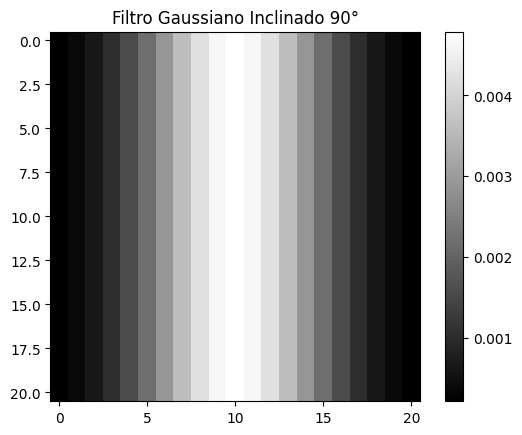

In [233]:
# Th de Sauvola
def ThSauvola(I,w = 12 , k= 0.2, R=128):
    I = I.astype(np.float32)
    
    mu = uniform_filter(I, w, mode='reflect')
    
    mu_sq = uniform_filter(I**2, w, mode='reflect')
    s = np.sqrt(mu_sq - mu**2)

    Th = mu * (1 + k * ((s / R) - 1))
    return (I> Th).astype(np.uint8)*255, Th

# filtro gaureano de perfil (no lo uso pero por si les sirve) se supone que detecta estructuras tubulares
def gausP (K,sig=1,teta=45):
    gau = lambda x: 1/((np.pi*2)**0.5*sig)*np.exp(-x**2/2*sig**2)
    
    grid = np.zeros((2 * K + 1, 2 * K + 1))

    # Convertir el ángulo a radianes
    teta_rad = np.deg2rad(teta)

    # Calcular el filtro inclinado aplicando la rotación
    for i in range(-K, K + 1):
        for j in range(-K, K + 1):
            # Rotar las coordenadas (x', y') = (x * cosθ - y * sinθ, x * sinθ + y * cosθ)
            x_rot = i * np.cos(teta_rad) + j * np.sin(teta_rad)
            grid[i + K, j + K] = gau(x_rot)

    # Normalizar el filtro para que la suma sea 1
    grid /= np.sum(grid)
    

    return grid

# Ejemplo de
filtro = gausP(10, sig=1/4, teta=90)
#Mostrar el filtro
plt.imshow(filtro, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.title(f'Filtro Gaussiano Inclinado {90}°')
plt.show()
    

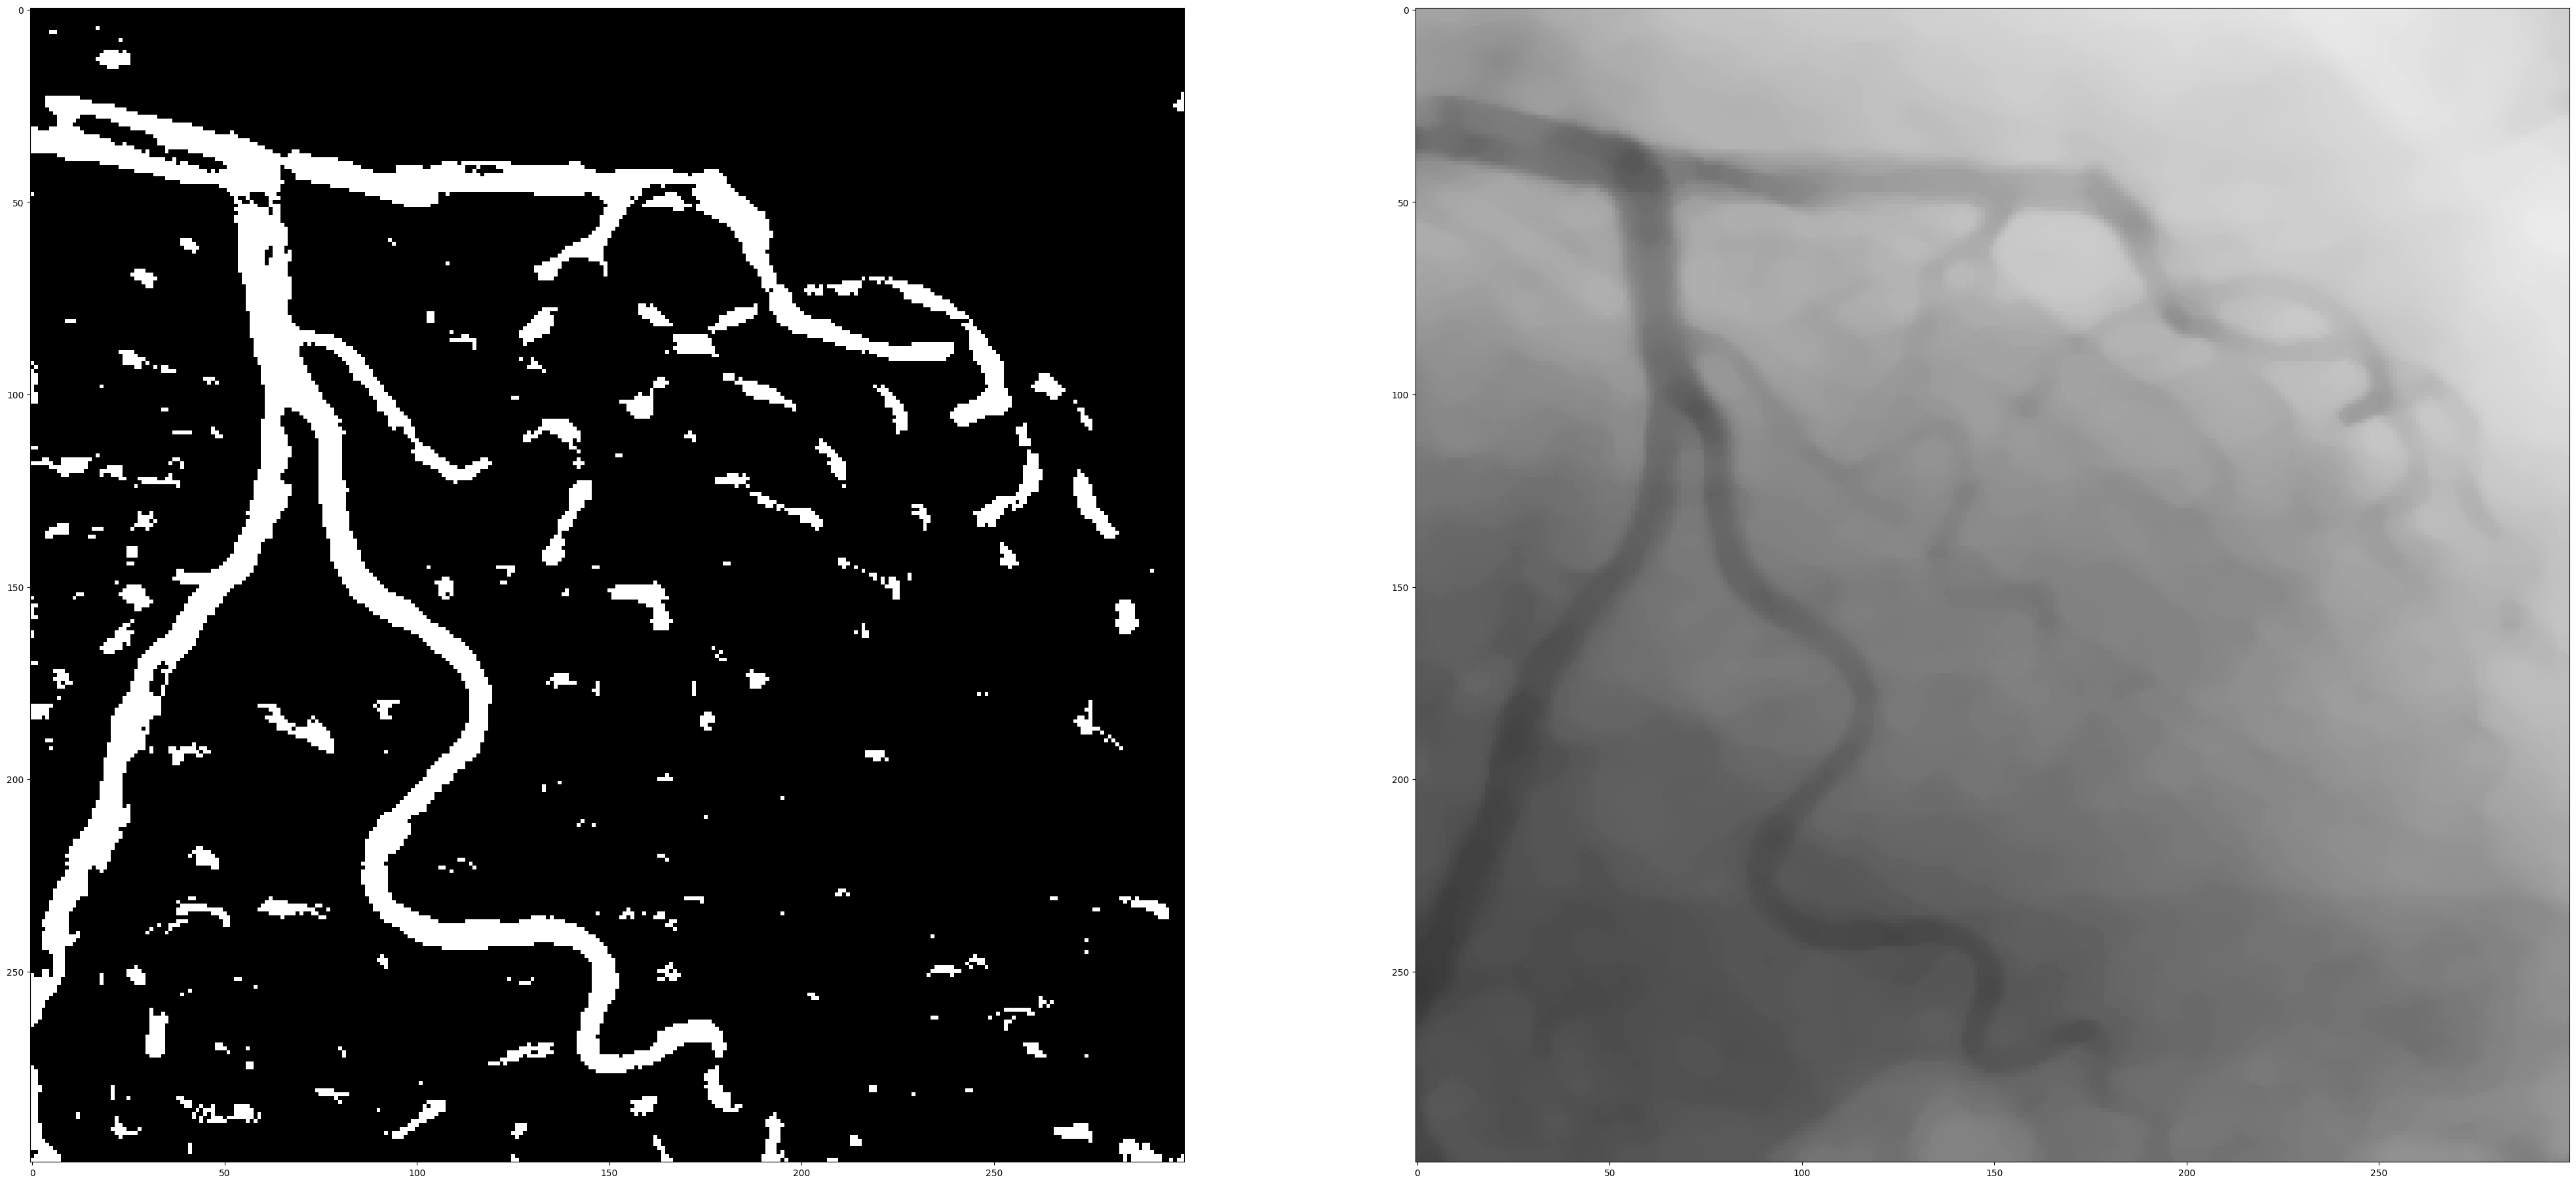

In [271]:
I = plt.imread('database/14.pgm')
S = cv.getStructuringElement(cv.MORPH_ELLIPSE,(15,15)) #44 #44
S2 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
#T = cv.morphologyEx(I,cv.MORPH_BLACKHAT,S) #HACE EL TRABAJO PERO CON MUCHO RUIDO
d = 5
f = np.array(([0,  -1 ,  0],  
            [-1  , 5 , -1 ] ,
            [0,  -1 ,  0]),dtype="int" ) 


#I = cv.filter2D(I,-1,f)

#I = cv.morphologyEx(I, cv.MORPH_CLOSE, S2)
I = cv.medianBlur(I, 7)
#I = cv.dilate(I, S2, iterations=3)
#I = cv.filter2D(I,-1,f)
#I = cv.(I, S2, iterations=3)

#I = cv.dilate(I, S2, iterations=1)
#I = cv.GaussianBlur(I,(21,21),0)
#I = cv.filter2D(I,-1,f)
I = cv.morphologyEx(I,cv.MORPH_OPEN,S2) #HACE EL TRABAJO mejor despues de un afilado

#T = cv.filter2D(T,-1,f)
#T, t  = ThLocal(I, 50,50)
#T ,i ,ii = ThRC(I)

T, th = ThSauvola(I,k=0.022, R = 128)#ski.exposure.equalize_hist(I, nbins=256, mask=None) k = 0.03
T = cv.morphologyEx(T,cv.MORPH_BLACKHAT,S) #HACE EL TRABAJO PERO CON MUCHO RUIDO
#T = cv.medianBlur(T, 3)



plt.figure(figsize=(50,50))
plt.subplot(1,2,1) 
plt.imshow(T,cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)                                 
plt.imshow(I,cmap='gray', vmin=0, vmax=255)
plt.show()